In [2]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Replace 'your_file.xlsx' with your actual file name
file_path = r'C:/Users/gargi/Downloads/US_Canada_Moho_Project.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())

        X      Y  Free Air Anomaly  Topo  Disturbance  Isostatic  \
0 -122.00  74.50            -3.532     3      -127.11    -16.743   
1 -121.75  74.50             0.699     5      -127.94    -11.394   
2 -121.50  74.50             7.224    70      -118.54    -14.603   
3 -121.25  74.50             2.304    92      -117.16    -21.504   
4 -124.50  74.25           -15.752     1      -128.14    -30.743   

   Bouguer Gravity  Mode Depth  
0          123.589     31.1633  
1          128.647     31.0656  
2          125.560     30.8514  
3          119.184     30.5397  
4          112.383     29.9641  


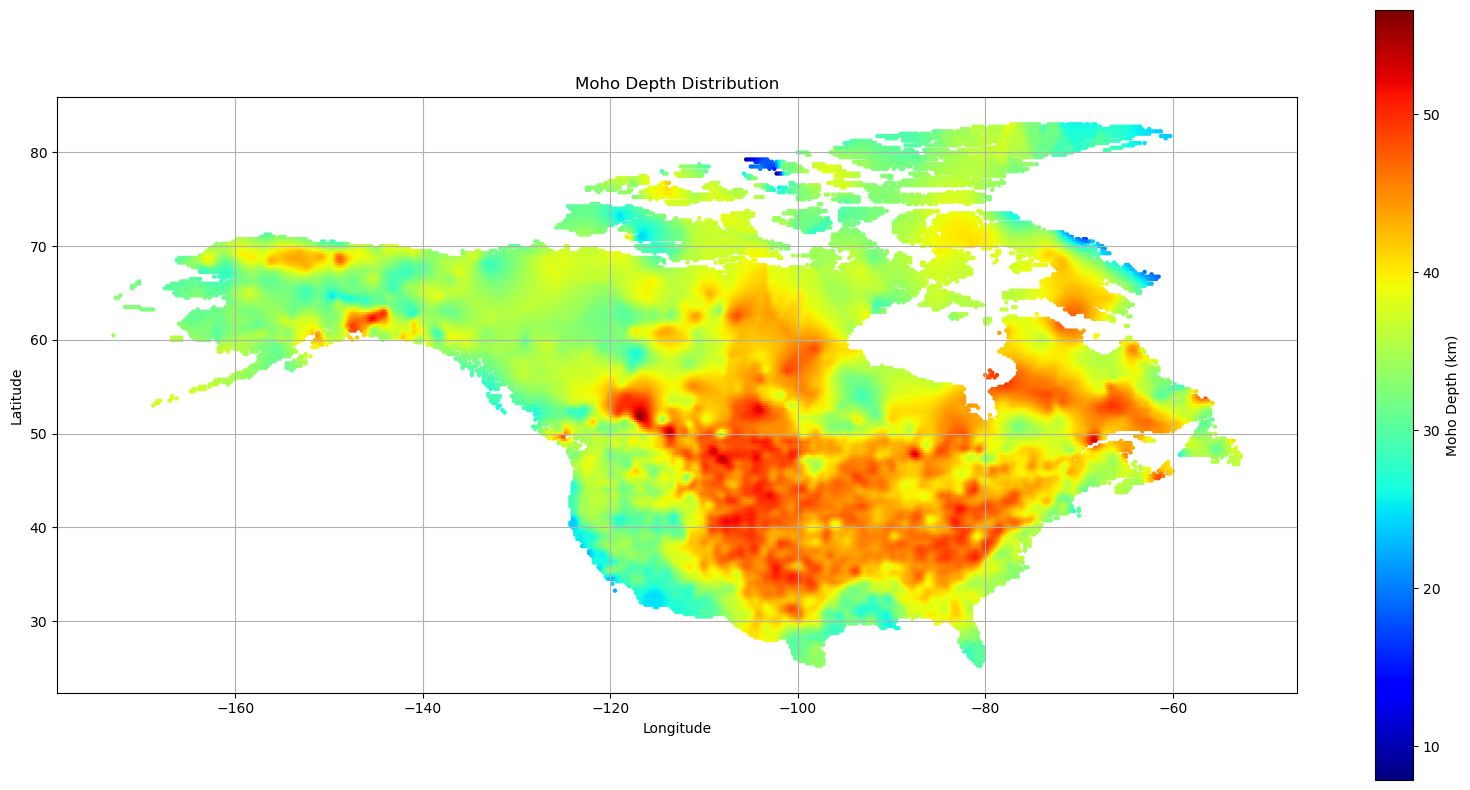

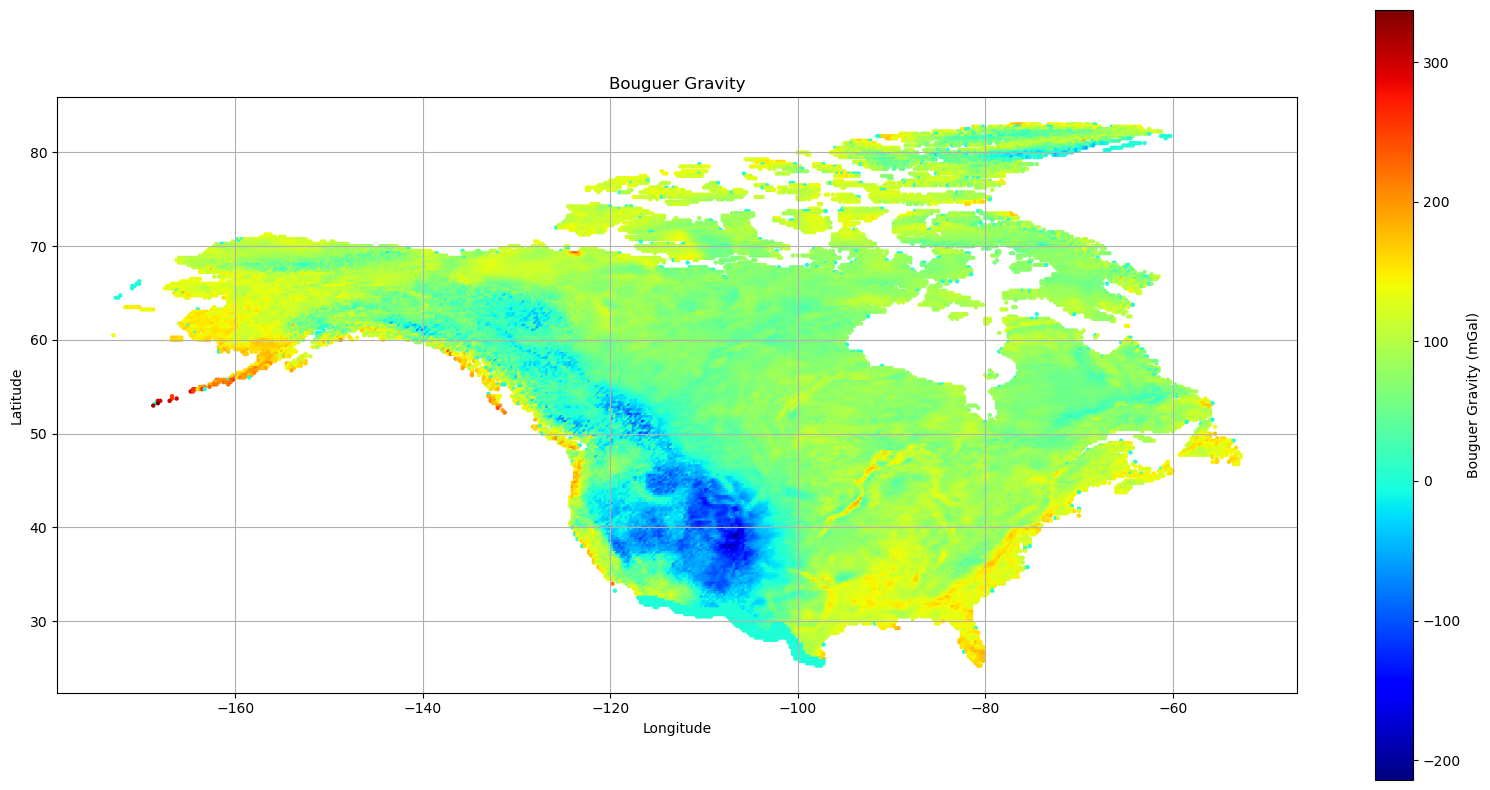

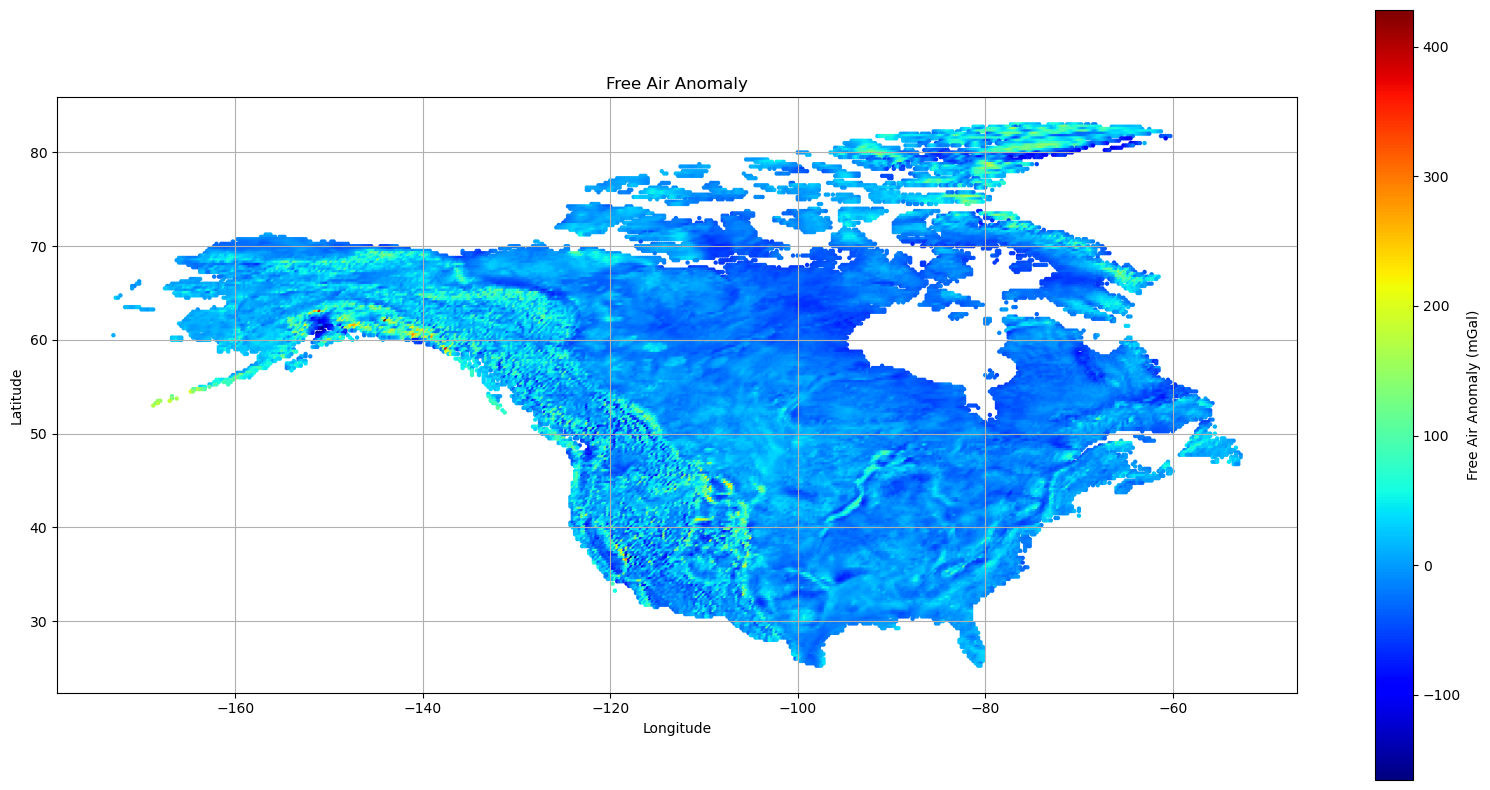

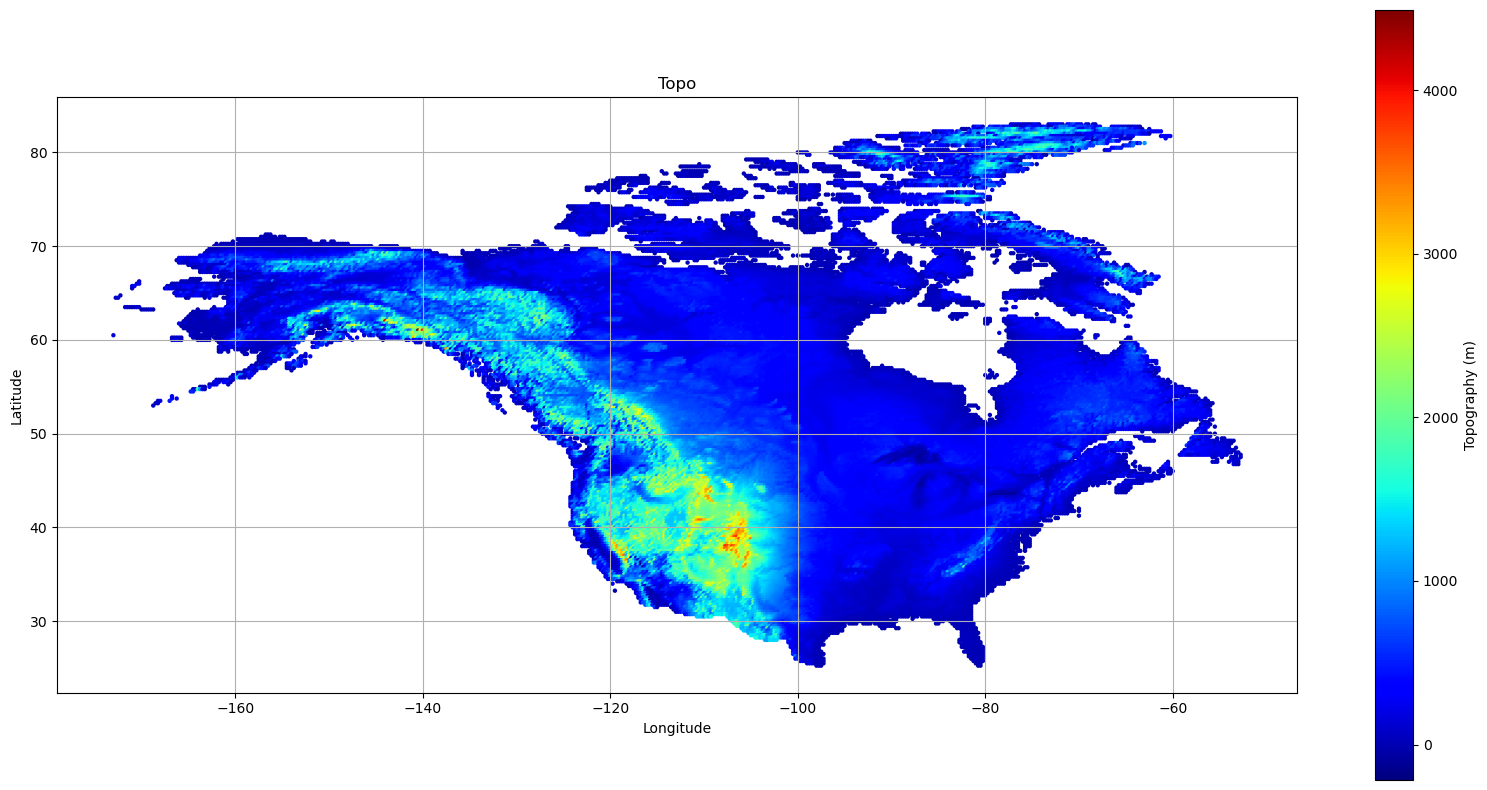

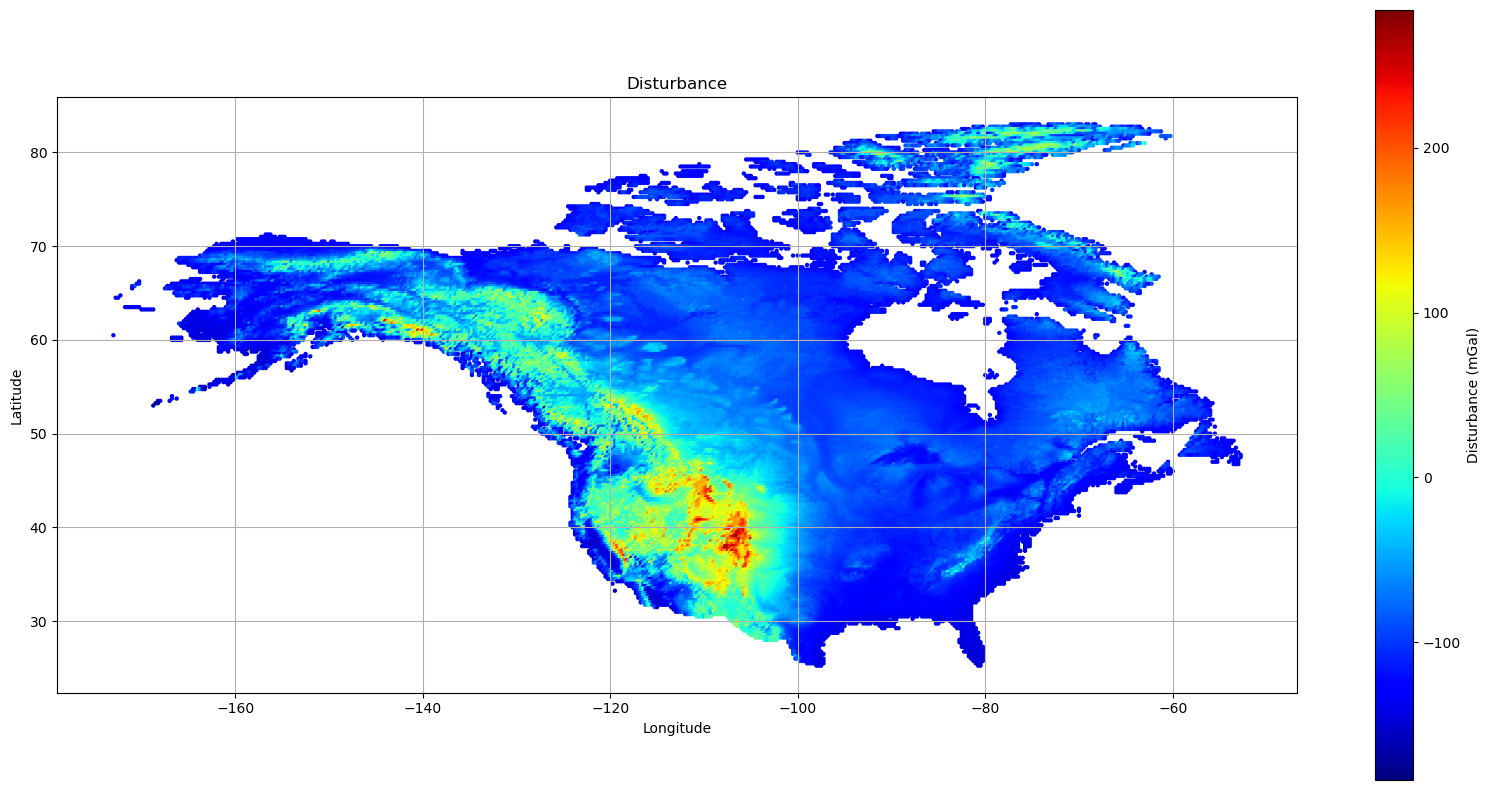

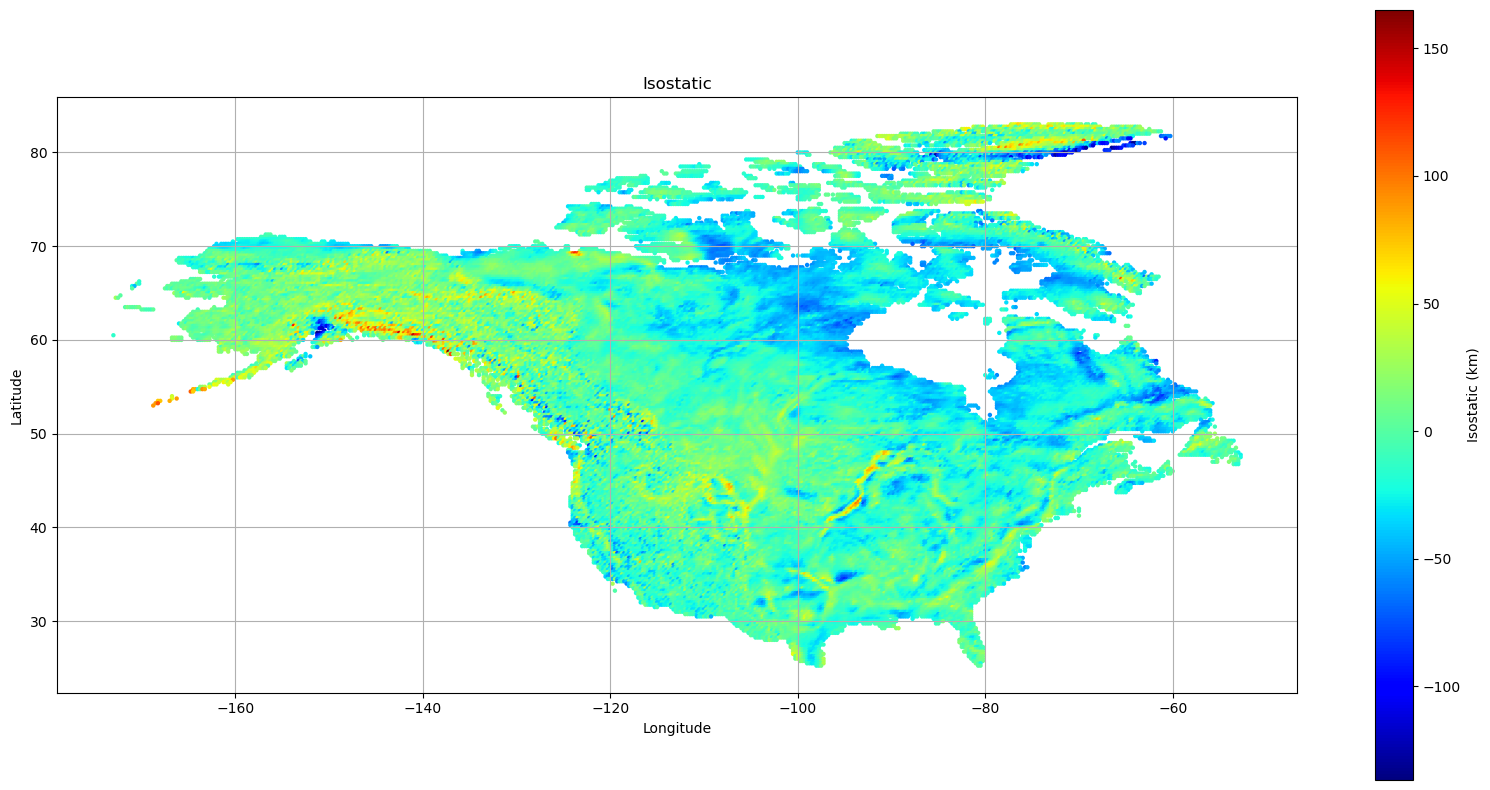

In [3]:
import matplotlib.pyplot as plt

# Sample data
XX = df['X']
YY = df['Y']
a = df['Mode Depth']
b = df['Bouguer Gravity']
c = df['Free Air Anomaly']
d = df['Topo']
e = df['Disturbance']
f = df['Isostatic']


# Plotting
plt.figure(figsize=(20, 10))
plt.scatter(XX, YY, s=10, c=a, cmap='jet', edgecolor='none')  # Set edgecolor to 'none' to remove circles
plt.colorbar(label='Moho Depth (km)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Moho Depth Distribution')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(XX, YY, s=10, c=b, cmap='jet', edgecolor='none')  # Set edgecolor to 'none' to remove circles
plt.colorbar(label='Bouguer Gravity (mGal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bouguer Gravity')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(XX, YY, s=10, c=c, cmap='jet', edgecolor='none')  # Set edgecolor to 'none' to remove circles
plt.colorbar(label='Free Air Anomaly (mGal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Free Air Anomaly')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(XX, YY, s=10, c=d, cmap='jet', edgecolor='none')  # Set edgecolor to 'none' to remove circles
plt.colorbar(label='Topography (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Topo')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(XX, YY, s=10, c=e, cmap='jet', edgecolor='none')  # Set edgecolor to 'none' to remove circles
plt.colorbar(label='Disturbance (mGal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Disturbance')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(XX, YY, s=10, c=f, cmap='jet', edgecolor='none')  # Set edgecolor to 'none' to remove circles
plt.colorbar(label='Isostatic (km)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Isostatic')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [4]:
# Assuming 'df' is your DataFrame containing the dataset
# Splitting the DataFrame into features (X) and target (y)
X = df.drop(columns=['X', 'Y', 'Mode Depth'])
y = df['Mode Depth']

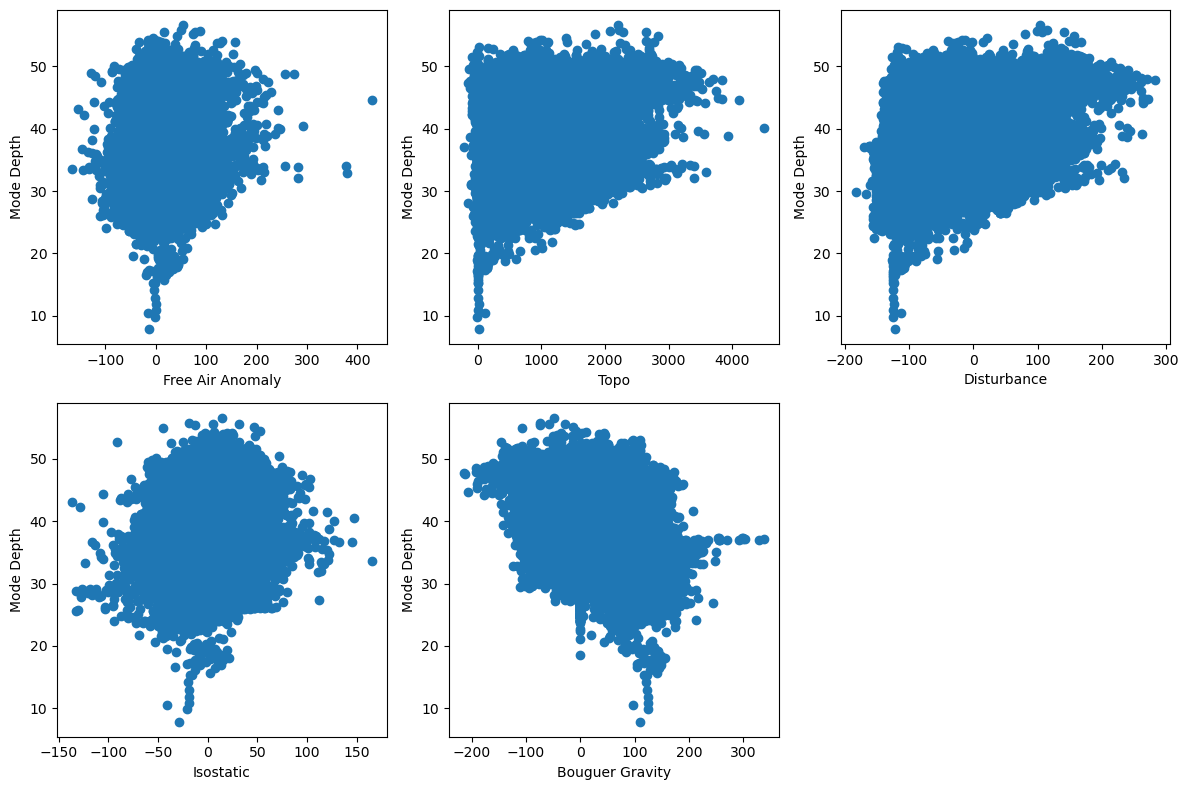

In [5]:
# Create pairwise scatter plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[feature], df['Mode Depth'])
    plt.xlabel(feature)
    plt.ylabel('Mode Depth')
plt.tight_layout()
plt.show()



Model Evaluation:
Mean Squared Error: 16.879685444332374
R-squared: 0.4428927749119266


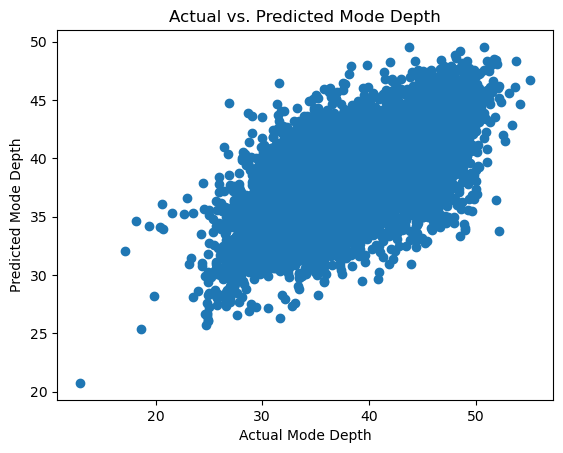

In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the features - Fit on training data, then transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train_scaled, y_train)

# Model Evaluation
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Mode Depth')
plt.ylabel('Predicted Mode Depth')
plt.title('Actual vs. Predicted Mode Depth')
plt.show()


c:\Users\gargi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


NameError: name 'np' is not defined

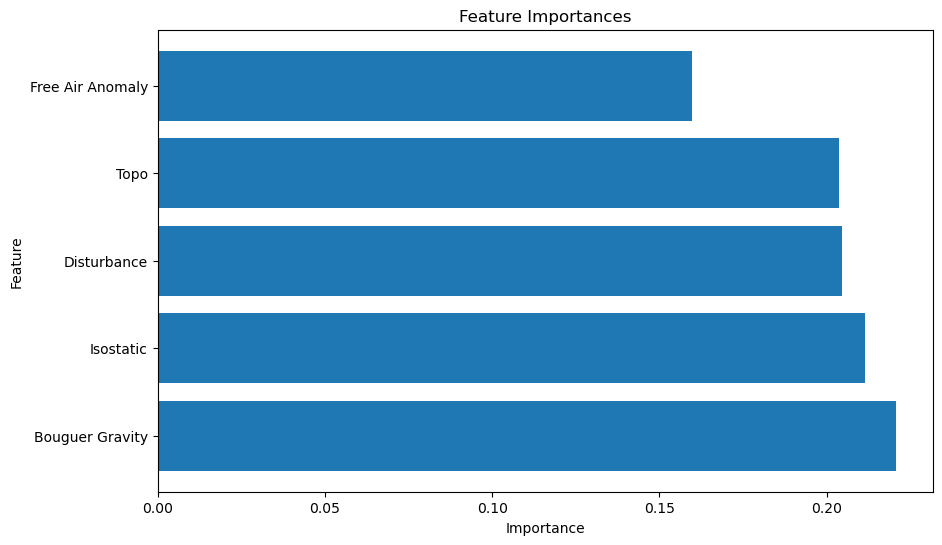

In [ ]:
# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


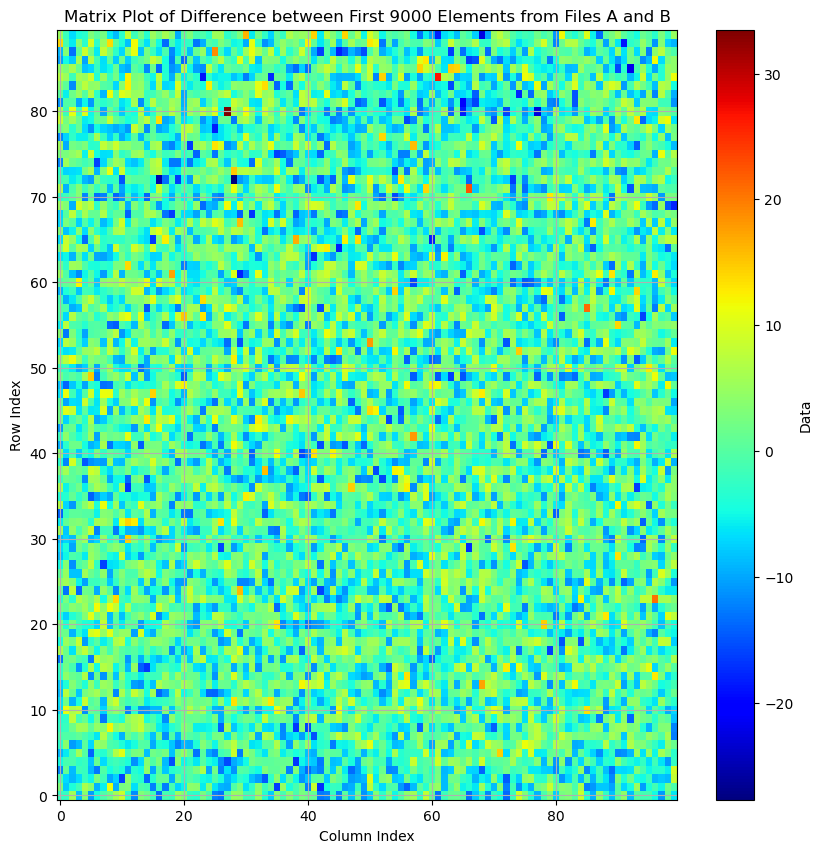

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file 'A' and 'B'
A = y_pred[:9000]  # Load first 9000 elements from y_pred
B = y_test[:9000].values  # Convert y_test to a NumPy array

# Reshape the data into matrices
matrix_A = A.reshape(90, 100)
matrix_B = B.reshape(90, 100)

# Residue = real data - prediction; the value for all pixcels should approch zero for the best model.
matrix_C = matrix_A - matrix_B

# Plotting the matrix
plt.figure(figsize=(10, 10))
plt.imshow(matrix_C, cmap='jet', origin='lower', aspect='auto', vmin=np.nanmin(matrix_C), vmax=np.nanmax(matrix_C))
plt.colorbar(label='Data')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.title('Matrix Plot of Difference between First 9000 Elements from Files A and B')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR with RBF kernel
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict mode depth using SVM
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Predict mode depth using Random Forest
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate SVM model
mse_svm = mean_squared_error(y_test, y_test_pred_svm)
r2_svm = r2_score(y_test, y_test_pred_svm)
print("SVM Model Evaluation:")
print(f"Mean Squared Error: {mse_svm}")
print(f"R-squared: {r2_svm}")

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)
print("\nRandom Forest Model Evaluation:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

SVM Model Evaluation:
Mean Squared Error: 22.453073178698762
R-squared: 0.2752491167442189

Random Forest Model Evaluation:
Mean Squared Error: 17.500164849518296
R-squared: 0.43512142721546143


In [ ]:
%pip install descartes
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


c:\Users\gargi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


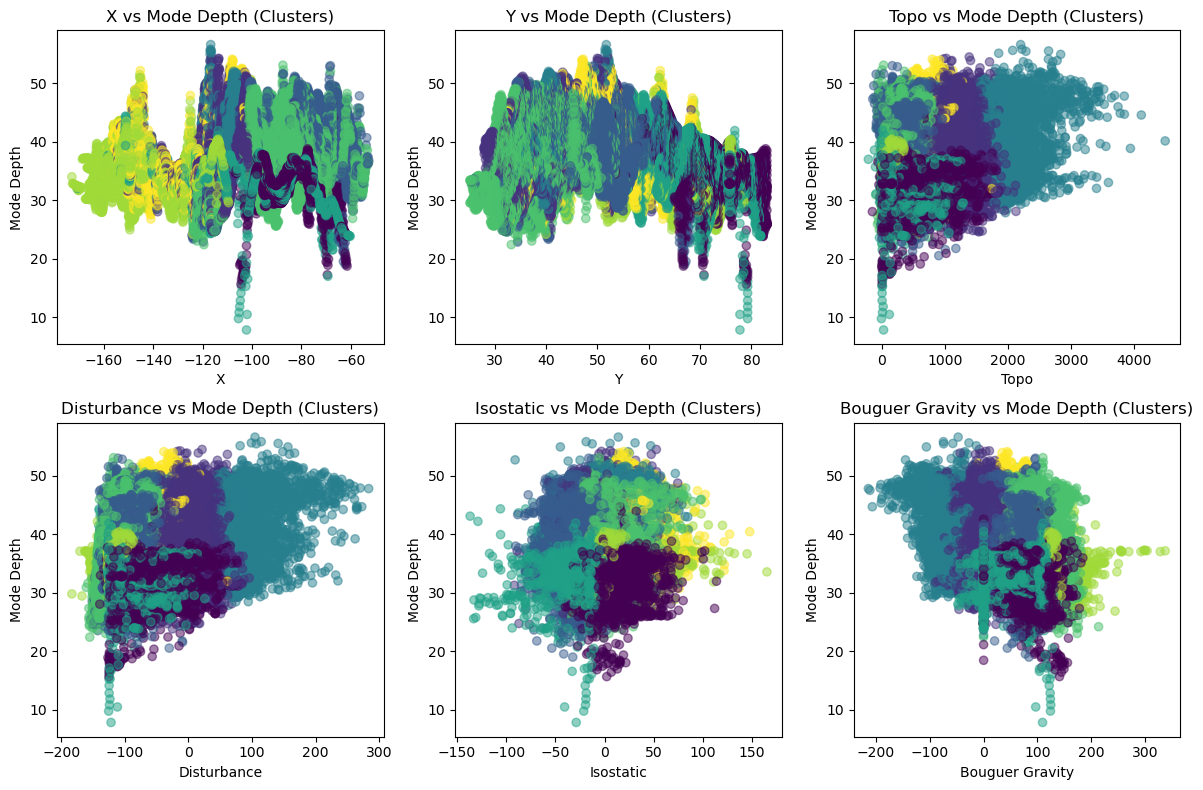

Model Evaluation:
Mean Squared Error: 0.09881351518954387
R-squared: 0.9967755948229249


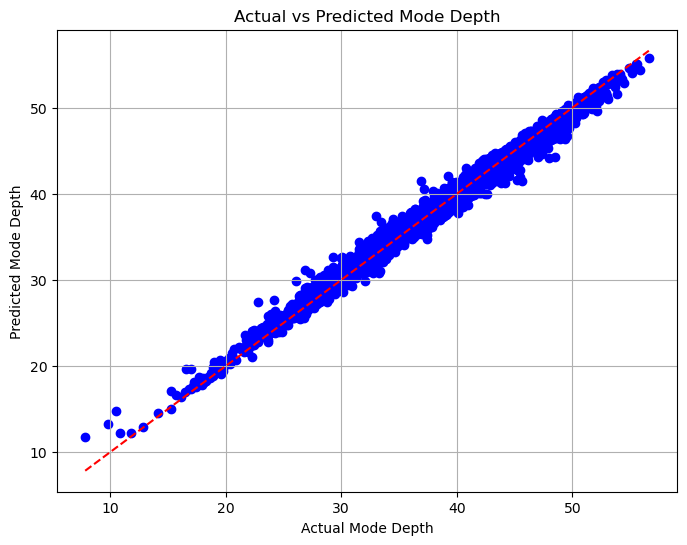

C:\Users\gargi\AppData\Local\Temp\ipykernel_20852\151102010.py:92: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


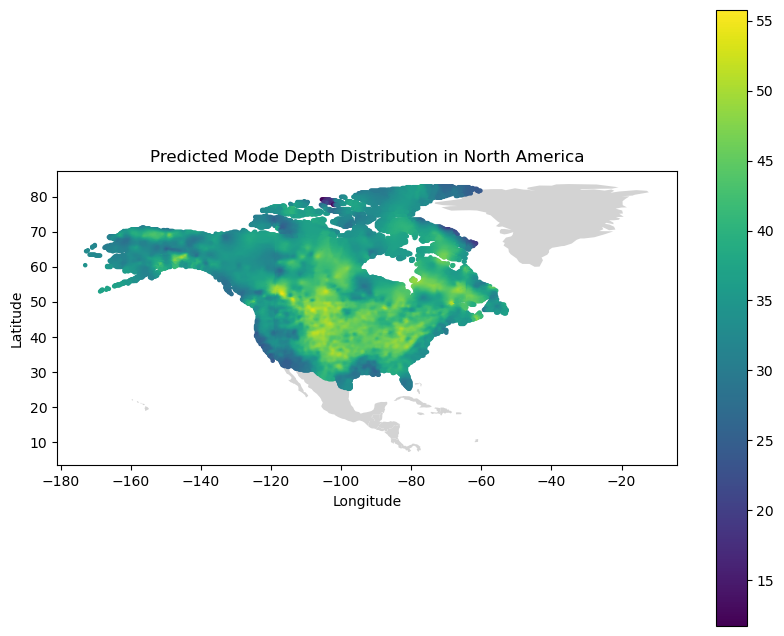

In [12]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r'C:/Users/gargi/Downloads/US_Canada_Moho_Project.xlsx'
df = pd.read_excel(file_path)

# Assuming 'df' is your DataFrame containing the dataset
# Splitting the DataFrame into features (X) and target (y)
X = df.drop(columns=['Mode Depth', 'Free Air Anomaly'])
y = df['Mode Depth']

# Create a StandardScaler object for features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Fit K-means clustering to identify segments based on feature space
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Scatter plots of clusters for each feature compared to mode depth
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X[feature], y, c=clusters, cmap='viridis', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Mode Depth')
    plt.title(f'{feature} vs Mode Depth (Clusters)')
plt.tight_layout()
plt.show()

# Save the cluster labels to the DataFrame
df['Cluster'] = clusters

# Fit Random Forest regression lines for each cluster
models = []
for cluster_label in np.unique(clusters):
    cluster_data = X_scaled[clusters == cluster_label]  # Selecting data for the cluster
    cluster_target = y[clusters == cluster_label]  # Target values for the cluster
    
    # Ensure that both the feature and target data have the same number of samples
    assert len(cluster_data) == len(cluster_target), "Inconsistent number of samples"
    
    model = RandomForestRegressor()  # Random Forest model
    model.fit(cluster_data, cluster_target)  # Fit Random Forest model
    models.append(model)

# Predict mode depth for the entire dataset
y_pred = np.zeros_like(y)
for i, model in enumerate(models):
    cluster_data = X_scaled[clusters == i]  # Selecting data for the cluster
    y_pred[clusters == i] = model.predict(cluster_data)  # Predict mode depth for the cluster

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted mode depth
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red')
plt.xlabel('Actual Mode Depth')
plt.ylabel('Predicted Mode Depth')
plt.title('Actual vs Predicted Mode Depth')
plt.grid(True)
plt.show()

# Save the trained models to .pkl files
with open("models_random_forest.pkl", 'wb') as f:
    pickle.dump(models, f)

with open("kmeans.pkl", 'wb') as f:
    pickle.dump(kmeans, f)

# Convert latitude and longitude to Points
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the map of North America
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
north_america = world[world['continent'] == 'North America']
fig, ax = plt.subplots(figsize=(10, 8))
north_america.plot(ax=ax, color='lightgrey')

# Plot the data points with predicted mode depth
gdf.plot(ax=ax, column=y_pred, cmap='viridis', markersize=5, legend=True)

plt.title('Predicted Mode Depth Distribution in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()
